# Resultados Experimentales - METABU

Este notebook ejecuta las tareas experimentales siguiendo el paper **METABU: Learning Meta-Features for AutoML**.

## Tareas Experimentales

1. **Task 1**: Assess topology defined by METABU meta-features
   - Métrica: **NDCG** (Normalized Discounted Cumulative Gain) - **higher is better**

2. **Task 2**: Assess configurations recommended after METABU
   - Métrica: **Average Rank** - **lower is better**

3. **Task 3**: Warm-starting optimization algorithms (pendiente)


## Configuración e Imports


In [29]:
import sys
import os
import pandas as pd
import numpy as np

# Visualización
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    HAS_VISUALIZATION = True
    plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'seaborn')
    sns.set_palette("husl")
    %matplotlib inline
except ImportError:
    HAS_VISUALIZATION = False
    print("⚠ matplotlib/seaborn no disponibles")

# Configurar paths
current_dir = os.getcwd()
if os.path.basename(current_dir) == 'experiment':
    project_root = os.path.dirname(current_dir)
    experiment_dir = current_dir
else:
    project_root = current_dir
    experiment_dir = os.path.join(project_root, 'experiment')

sys.path.insert(0, project_root)
sys.path.insert(0, experiment_dir)

# Importar módulos
os.chdir(experiment_dir)
import tasks
import utils
import importlib
importlib.reload(tasks)
importlib.reload(utils)
from tasks import run_task1, run_task2
from utils import load_basic_features, load_target_features
os.chdir(project_root)

# Ruta de datos
data_path = os.path.join(project_root, "data")

print(f"✓ Proyecto: {project_root}")
print(f"✓ Datos: {data_path}")
print("✓ Imports completados")


✓ Proyecto: /home/alex/Documents/GitHub/MetaLearning
✓ Datos: /home/alex/Documents/GitHub/MetaLearning/data
✓ Imports completados


## Clases de Configuración


In [30]:
class MockPipeline:
    def __init__(self, name):
        self.name = name

class MockMetafeature:
    def __init__(self, name, basic_columns):
        self.name = name
        self.basic_columns = basic_columns

class MockTask:
    def __init__(self, ndcg=10, k_neighbors=3, top_n_per_neighbor=5, use_baseline=False):
        self.ndcg = ndcg
        self.k_neighbors = k_neighbors
        self.top_n_per_neighbor = top_n_per_neighbor
        self.use_baseline = use_baseline

class MockConfig:
    def __init__(self, pipeline_name="adaboost", metafeature_name="basic_only", 
                 openml_tid=None, data_path=None, seed=42, ndcg=10, 
                 k_neighbors=3, top_n_per_neighbor=5, use_baseline=False):
        if data_path is None:
            data_path = os.path.join(project_root, "data")
        
        self.pipeline = MockPipeline(pipeline_name)
        
        # Cargar basic representations para obtener columnas
        basic_reprs = pd.read_csv(os.path.join(data_path, "basic_representations.csv"))
        basic_cols = [c for c in basic_reprs.columns if c != 'task_id']
        
        self.metafeature = MockMetafeature(metafeature_name, ",".join(basic_cols))
        self.openml_tid = openml_tid
        self.data_path = data_path
        self.seed = seed
        self.output_file = None
        self.task = MockTask(ndcg=ndcg, k_neighbors=k_neighbors, 
                            top_n_per_neighbor=top_n_per_neighbor, 
                            use_baseline=use_baseline)

print("✓ Clases de configuración definidas")


✓ Clases de configuración definidas


## Cargar Datos y Seleccionar Task IDs


In [31]:
# Cargar target representations para ver qué task_ids están disponibles
target_reprs = load_target_features(
    pipeline=MockPipeline("adaboost"), 
    path=data_path
)
list_ids = sorted(target_reprs["task_id"].unique())

print(f"Total de datasets disponibles: {len(list_ids)}")
print(f"Task IDs: {list_ids[:10]}...")

# Seleccionar task_ids para evaluación
test_task_ids = list_ids[:5]  # Primeros 5 datasets
print(f"\nTask IDs seleccionados: {test_task_ids}")


Total de datasets disponibles: 64
Task IDs: [np.int64(3), np.int64(6), np.int64(11), np.int64(12), np.int64(14), np.int64(15), np.int64(16), np.int64(18), np.int64(22), np.int64(23)]...

Task IDs seleccionados: [np.int64(3), np.int64(6), np.int64(11), np.int64(12), np.int64(14)]


## Task 1: Evaluar Topología (NDCG)

**Objetivo:** Comparar la topología definida por las meta-features de METABU con la topología basada en target representations.

**Métrica:** NDCG@k - **higher is better**


In [32]:
# Ejecutar Task 1 para cada dataset
task1_results = []

for task_id in test_task_ids:
    print(f"\n{'='*70}")
    print(f"Evaluando Task 1 para task_id: {task_id}")
    print(f"{'='*70}")
    
    cfg = MockConfig(
        pipeline_name="adaboost",
        metafeature_name="basic_only",
        openml_tid=task_id,
        data_path=data_path,
        ndcg=10
    )
    
    try:
        ndcg_score = run_task1(cfg)
        
        result = {
            'task_id': task_id,
            'ndcg_score': ndcg_score,
            'pipeline': cfg.pipeline.name,
            'metafeature': cfg.metafeature.name
        }
        task1_results.append(result)
        
        print(f"✓ NDCG@{cfg.task.ndcg}: {ndcg_score:.4f}")
    except Exception as e:
        print(f"✗ Error: {e}")
        import traceback
        traceback.print_exc()

print(f"\n{'='*70}")
print("Task 1 completada")
print(f"{'='*70}")



Evaluando Task 1 para task_id: 3
Task 1: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 3 
- NDCG@10: 0.2
✓ NDCG@10: 0.2000

Evaluando Task 1 para task_id: 6
Task 1: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 6 
- NDCG@10: 0.3
✓ NDCG@10: 0.3000

Evaluando Task 1 para task_id: 11
Task 1: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 11 
- NDCG@10: 0.4
✓ NDCG@10: 0.4000

Evaluando Task 1 para task_id: 12
Task 1: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 12 
- NDCG@10: 0.4
✓ NDCG@10: 0.4000

Evaluando Task 1 para task_id: 14
Task 1: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 14 
- NDCG@10: 0.2
✓ NDCG@10: 0.2000

Task 1 completada


### Resultados Task 1


RESUMEN - Task 1

Resultados por dataset:
 task_id  ndcg_score
       3         0.2
       6         0.3
      11         0.4
      12         0.4
      14         0.2

Estadísticas:
  NDCG promedio: 0.3000
  NDCG mediano: 0.3000
  NDCG std: 0.1000
  NDCG máximo: 0.4000
  NDCG mínimo: 0.2000


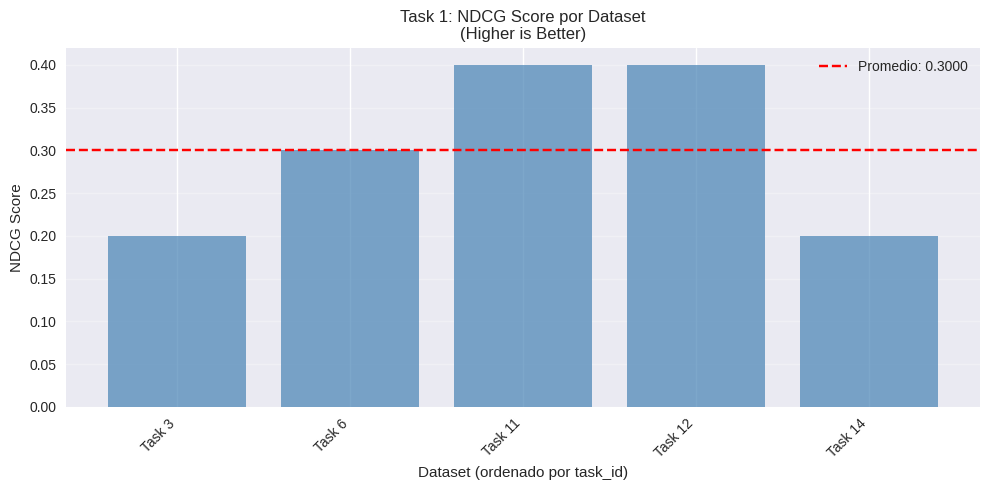

In [33]:
if task1_results:
    task1_df = pd.DataFrame(task1_results)
    
    print("="*70)
    print("RESUMEN - Task 1")
    print("="*70)
    print("\nResultados por dataset:")
    print(task1_df[['task_id', 'ndcg_score']].to_string(index=False))
    
    print(f"\nEstadísticas:")
    print(f"  NDCG promedio: {task1_df['ndcg_score'].mean():.4f}")
    print(f"  NDCG mediano: {task1_df['ndcg_score'].median():.4f}")
    print(f"  NDCG std: {task1_df['ndcg_score'].std():.4f}")
    print(f"  NDCG máximo: {task1_df['ndcg_score'].max():.4f}")
    print(f"  NDCG mínimo: {task1_df['ndcg_score'].min():.4f}")
    
    # Visualización
    if HAS_VISUALIZATION:
        fig, ax = plt.subplots(figsize=(10, 5))
        task1_df_sorted = task1_df.sort_values('task_id')
        ax.bar(range(len(task1_df_sorted)), task1_df_sorted['ndcg_score'], 
               color='steelblue', alpha=0.7)
        ax.set_xlabel('Dataset (ordenado por task_id)')
        ax.set_ylabel('NDCG Score')
        ax.set_title('Task 1: NDCG Score por Dataset\n(Higher is Better)')
        ax.set_xticks(range(len(task1_df_sorted)))
        ax.set_xticklabels([f"Task {tid}" for tid in task1_df_sorted['task_id']], 
                           rotation=45, ha='right')
        ax.grid(axis='y', alpha=0.3)
        ax.axhline(y=task1_df['ndcg_score'].mean(), color='red', linestyle='--', 
                  label=f'Promedio: {task1_df["ndcg_score"].mean():.4f}')
        ax.legend()
        plt.tight_layout()
        plt.show()
else:
    print("No hay resultados de Task 1")


In [34]:
# Ejecutar Task 2 para cada dataset
task2_results = []

for task_id in test_task_ids:
    print(f"\n{'='*70}")
    print(f"Evaluando Task 2 para task_id: {task_id}")
    print(f"{'='*70}")
    
    cfg = MockConfig(
        pipeline_name="adaboost",
        metafeature_name="basic_only",
        openml_tid=task_id,
        data_path=data_path,
        ndcg=10,
        k_neighbors=3,
        top_n_per_neighbor=5,
        use_baseline=True  # Comparar con baseline (hand-crafted meta-features)
    )
    
    try:
        recommended_configs, nearest_neighbor_ids, average_rank, baseline_average_rank = run_task2(cfg)
        
        result = {
            'task_id': task_id,
            'nearest_neighbors': nearest_neighbor_ids,
            'num_recommended_configs': len(recommended_configs),
            'average_rank': average_rank,
            'baseline_average_rank': baseline_average_rank
        }
        task2_results.append(result)
        
        print(f"✓ Average Rank: {average_rank:.2f}")
        if baseline_average_rank is not None:
            print(f"✓ Baseline Average Rank: {baseline_average_rank:.2f}")
            print(f"✓ Mejora: {baseline_average_rank - average_rank:.2f}")
    except Exception as e:
        print(f"✗ Error: {e}")
        import traceback
        traceback.print_exc()

print(f"\n{'='*70}")
print("Task 2 completada")
print(f"{'='*70}")



Evaluando Task 2 para task_id: 3
Task 2: Found 3 nearest neighbors for task 3: [np.int64(146824), np.int64(11), np.int64(146800)]
Task 2: Extracted 15 recommended configurations from neighbors
  Configuraciones recomendadas: 15
  Configuraciones encontradas en test: 8/15
  Total configuraciones en test: 20
Task 2: Average rank of recommended configurations: 14.27
Task 2: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 3 
- k neighbors: 3 
- Recommended configs: 15 
- Average rank: 14.27
✓ Average Rank: 14.27

Evaluando Task 2 para task_id: 6
Task 2: Found 3 nearest neighbors for task 6: [np.int64(14969), np.int64(9985), np.int64(18)]
Task 2: Extracted 15 recommended configurations from neighbors
  Configuraciones recomendadas: 15
  Configuraciones encontradas en test: 6/15
  Total configuraciones en test: 20
Task 2: Average rank of recommended configurations: 15.13
Task 2: 
- pipeline: adaboost 
- Metafeature: basic_only 
- OpenML task: 6 
- k neighbors: 3 
- Recommen

### Resultados Task 2


RESUMEN - Task 2

Resultados por dataset:
 task_id  average_rank baseline_average_rank
       3     14.266667                  None
       6     15.133333                  None
      11     11.733333                  None
      12     12.133333                  None
      14     14.000000                  None

Estadísticas:
  Average Rank promedio: 13.45
  Average Rank mediano: 14.00
  Average Rank std: 1.46


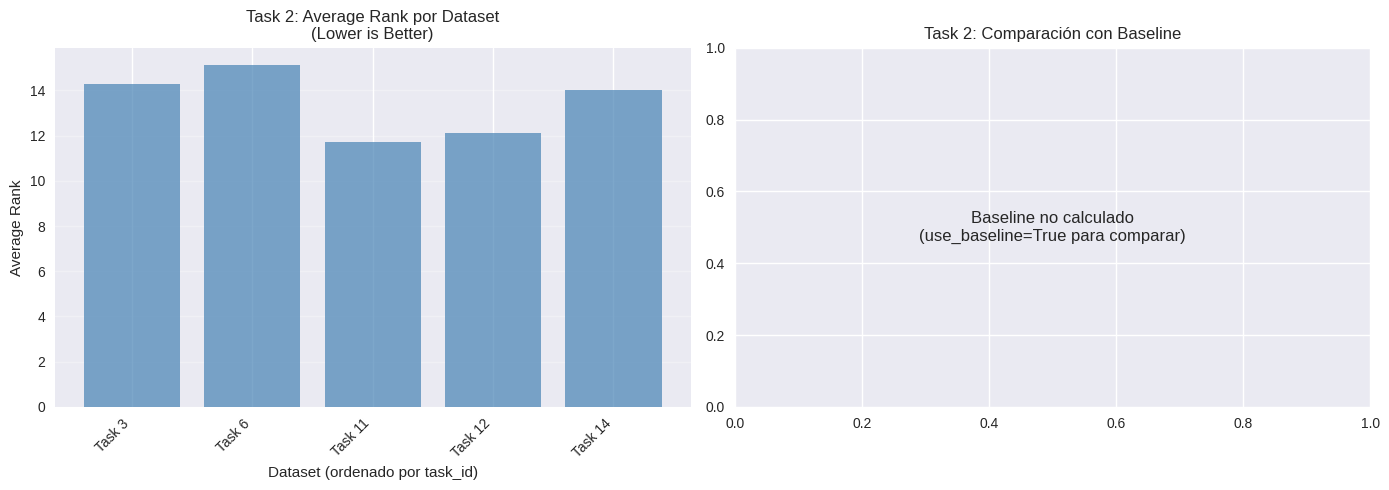

In [35]:
if task2_results:
    results_df = pd.DataFrame(task2_results)
    
    print("="*70)
    print("RESUMEN - Task 2")
    print("="*70)
    print("\nResultados por dataset:")
    print(results_df[['task_id', 'average_rank', 'baseline_average_rank']].to_string(index=False))
    
    print(f"\nEstadísticas:")
    print(f"  Average Rank promedio: {results_df['average_rank'].mean():.2f}")
    print(f"  Average Rank mediano: {results_df['average_rank'].median():.2f}")
    print(f"  Average Rank std: {results_df['average_rank'].std():.2f}")
    
    if results_df['baseline_average_rank'].notna().any():
        print(f"\n  Baseline Average Rank promedio: {results_df['baseline_average_rank'].mean():.2f}")
        print(f"  Mejora promedio: {(results_df['baseline_average_rank'] - results_df['average_rank']).mean():.2f}")
    
    # Visualización
    if HAS_VISUALIZATION:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gráfico 1: Average Rank por dataset
        ax1 = axes[0]
        results_df_sorted = results_df.sort_values('task_id')
        ax1.bar(range(len(results_df_sorted)), results_df_sorted['average_rank'], 
                color='steelblue', alpha=0.7)
        ax1.set_xlabel('Dataset (ordenado por task_id)')
        ax1.set_ylabel('Average Rank')
        ax1.set_title('Task 2: Average Rank por Dataset\n(Lower is Better)')
        ax1.set_xticks(range(len(results_df_sorted)))
        ax1.set_xticklabels([f"Task {tid}" for tid in results_df_sorted['task_id']], 
                            rotation=45, ha='right')
        ax1.grid(axis='y', alpha=0.3)
        
        # Gráfico 2: Comparación con baseline (si está disponible)
        ax2 = axes[1]
        if results_df['baseline_average_rank'].notna().any():
            x = np.arange(len(results_df_sorted))
            width = 0.35
            ax2.bar(x - width/2, results_df_sorted['average_rank'], width, 
                   label='METABU', color='steelblue', alpha=0.7)
            ax2.bar(x + width/2, results_df_sorted['baseline_average_rank'], width,
                   label='Baseline (Hand-crafted)', color='coral', alpha=0.7)
            ax2.set_xlabel('Dataset')
            ax2.set_ylabel('Average Rank')
            ax2.set_title('Task 2: METABU vs Baseline\n(Lower is Better)')
            ax2.set_xticks(x)
            ax2.set_xticklabels([f"Task {tid}" for tid in results_df_sorted['task_id']], 
                               rotation=45, ha='right')
            ax2.legend()
            ax2.grid(axis='y', alpha=0.3)
        else:
            ax2.text(0.5, 0.5, 'Baseline no calculado\n(use_baseline=True para comparar)', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title('Task 2: Comparación con Baseline')
        
        plt.tight_layout()
        plt.show()
else:
    print("No hay resultados de Task 2")


## Task 3: Warm-starting Optimization Algorithms

**Estado:** Pendiente de implementación

**Objetivo:** Evaluar el rendimiento de algoritmos de optimización warm-started con configuraciones recomendadas por METABU.


## Conclusiones

Los resultados de Task 1 y Task 2 muestran el rendimiento del modelo METABU en las tareas experimentales definidas en el paper.
